!pip install numba==0.48 <br>
!pip install librosa <br>
!pip install PyAudio <br>
!pip install numpy <br>
!pip install scikit-learn <br>
!pip install matplotlib <br>

In [15]:
!pip install pipwin
!pipwin install pyaudio

  Using cached https://files.pythonhosted.org/packages/5d/94/d47b0fd5988e6b7059de05720a646a2930920fff247a826f61674d436ba4/tzlocal-2.1-py2.py3-none-any.whl
  Stored in directory: C:\Users\elain\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Stored in directory: C:\Users\elain\AppData\Local\pip\Cache\wheels\a2\73\e6\3e433f3fd78257c3f971baf8cc9001cc0c4797268c61751e89
Successfully built docopt pyjsparser
  Found existing installation: beautifulsoup4 4.7.1
    Uninstalling beautifulsoup4-4.7.1:
      Successfully uninstalled beautifulsoup4-4.7.1
Building cache. Hang on . . .
Done
Package `pyaudio` found in cache
https://download.lfd.uci.edu/pythonlibs/x2tqcw5k/PyAudio-0.2.11-cp37-cp37m-win_amd64.whl
PyAudio-0.2.11-cp37-cp37m-win_amd64.whl
[*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s le

In [7]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pyaudio

  Using cached https://files.pythonhosted.org/packages/ab/42/b4f04721c5c5bfc196ce156b3c768998ef8c0ae3654ed29ea5020c749a6b/PyAudio-0.2.11.tar.gz
  Complete output from command D:\Users\elain\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\elain\\AppData\\Local\\Temp\\pip-install-ohqmxprx\\pyaudio\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\elain\AppData\Local\Temp\pip-wheel-5mt14m6q --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  copying src\pyaudio.py -> build\lib.win-amd64-3.7
  running build_ext
  building '_portaudio' extension
  creating build\temp.win-amd64-3.7
  creating build\temp.win-amd64-3.7\Release
  creating build\temp.win-amd64-3.7\Release\src
  C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\bin\HostX86\x6

  Failed building wheel for pyaudio
Command "D:\Users\elain\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\elain\\AppData\\Local\\Temp\\pip-install-ohqmxprx\\pyaudio\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\elain\AppData\Local\Temp\pip-record-xpv2ukmy\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\elain\AppData\Local\Temp\pip-install-ohqmxprx\pyaudio\


In [1]:
from platform import python_version

print(python_version())

3.7.3


## Feature Extraction basics

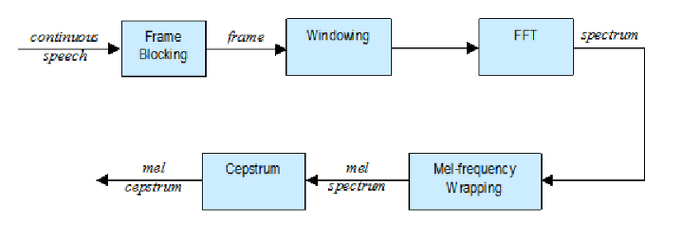

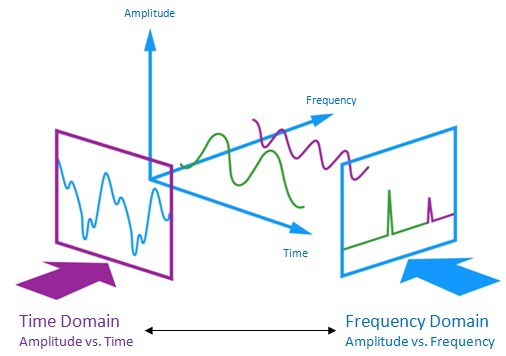

## Including Libraries and packages

In [2]:
import librosa
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [3]:
librosa.__version__

'0.8.0'

## Loading an audio

In [4]:
# audio_path = 'example_music.mp3' #trabalhar com python 3.6 pra não ter treta com mp3
# audio_path = 'example.wav'
audio_path = 'example_music.wav'
x,sr = librosa.load(audio_path, sr = 22050)
print(type(x),type(sr))
print(x, sr)

<class 'numpy.ndarray'> <class 'int'>
[ 1.3776767e-06 -7.5971084e-06  5.1224371e-09 ...  4.4764358e-05
  2.4325353e-05 -2.2518680e-06] 22050


## Playing an audio

In [5]:
import IPython.display as ipd

In [6]:
ipd.Audio(audio_path)

## Plot the signal:

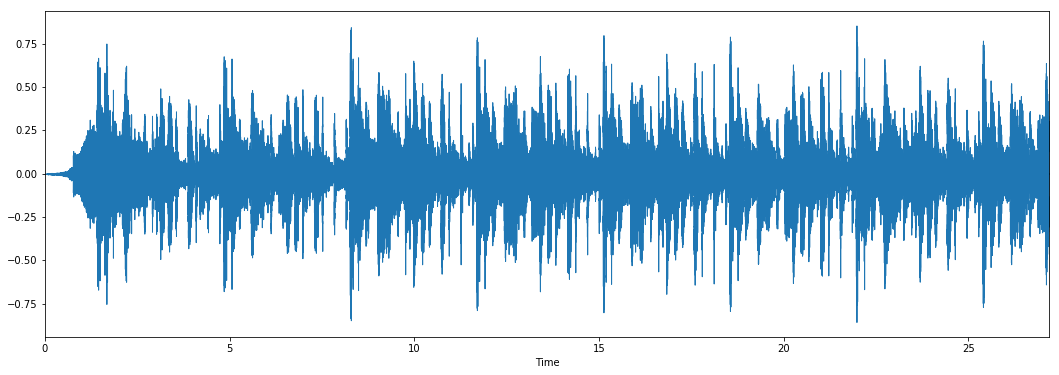

In [7]:
# Waveplot - amplitude x time
plt.figure(figsize=(18,6))
librosa.display.waveplot(x,sr=sr)
plt.show()

## Display Spectrogram

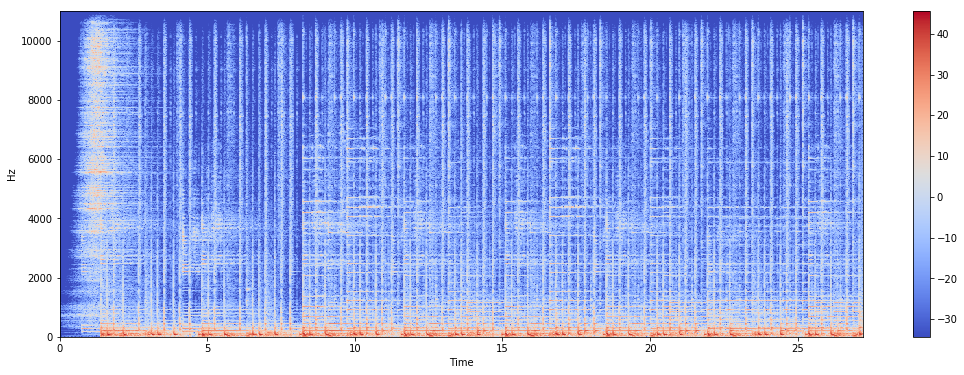

In [8]:
# spectogram - amplitude frequency x time
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18,6))
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.show()

## Zooming in and find Zero Crossing Rate

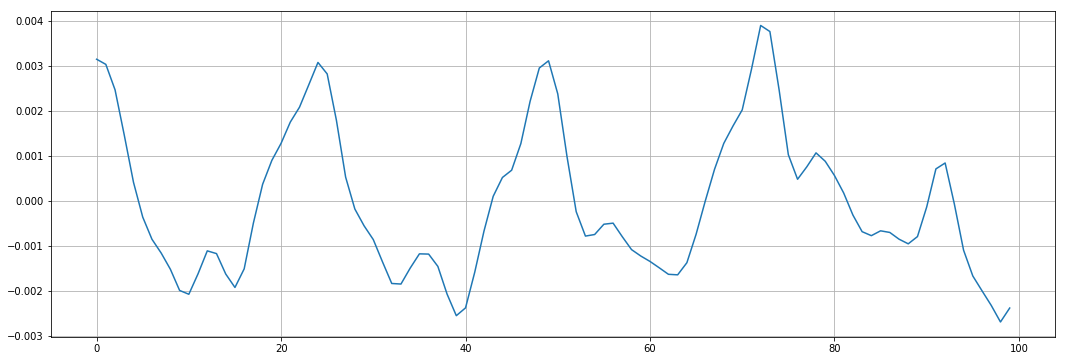

In [9]:
# zero crossing rate - são os momentos em que a amplitude do som corta o eixo zero pasando a ser positiva ou negativa
n0 = 9000
n1 = 9100
plt.figure(figsize=(18,6))
plt.plot(x[n0:n1])
plt.grid()

In [10]:
zero_crossings = librosa.zero_crossings(x[n0:n1],pad = False)
print(sum(zero_crossings))

9


## spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

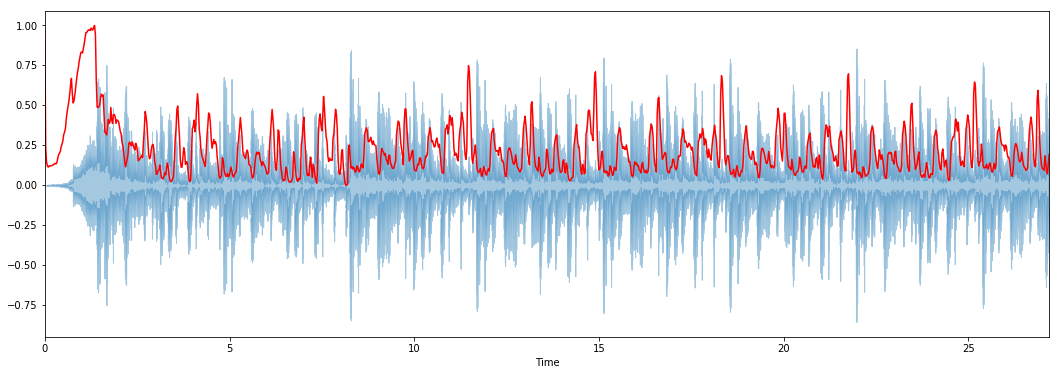

In [11]:
spectral_centroids = librosa.feature.spectral_centroid(x,sr = sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x,axis = 0):
    return sklearn.preprocessing.minmax_scale(x,axis = axis)
plt.figure(figsize=(18,6))
librosa.display.waveplot(x,sr=sr,alpha = 0.4)
plt.plot(t,normalize(spectral_centroids),color = 'r')
plt.show()

## Spectral Rolloff

[]

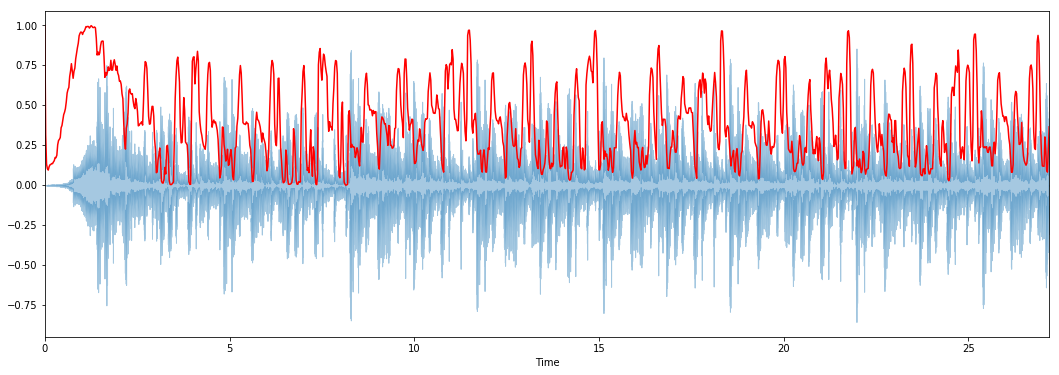

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(x,sr=sr)[0]
plt.figure(figsize=(18,6))
librosa.display.waveplot(x,sr=sr,alpha = 0.4)
plt.plot(t,normalize(spectral_rolloff),color='r')
plt.plot()

## MFCC — Mel-Frequency Cepstral Coefficients

(20, 1172)


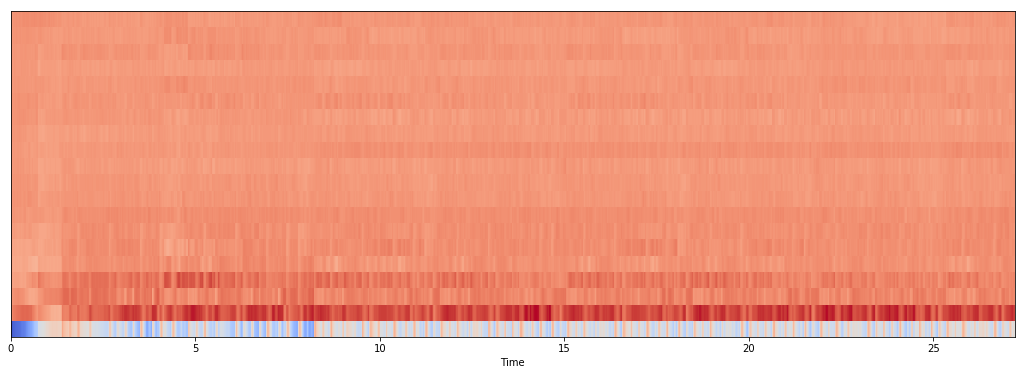

In [41]:
mfcc = librosa.feature.mfcc(x,sr=sr)
print(mfcc.shape)
plt.figure(figsize=(18,6))
librosa.display.specshow(mfcc,sr=sr,x_axis='time')
plt.show()